In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.cluster import KMeans

# supress scientific notation
np.set_printoptions(suppress=True)

import wrangle

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = wrangle.wrangle_zillow()

In [3]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,acres,age,county
0,14297519,3.5,4.0,3100.0,6059.0,33634931.0,-117869207.0,53571.0,1286.0,96978.0,485713.0,1023282.0,537569.0,11013.72,0.025595,2017-01-01,0.103444,19.0,Orange
1,17052889,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,13091.0,2061.0,97099.0,88000.0,464000.0,376000.0,5672.48,0.055619,2017-01-01,0.290335,50.0,Ventura
2,14186244,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,21412.0,1286.0,97078.0,85289.0,564778.0,479489.0,6488.30,0.005383,2017-01-01,0.193572,55.0,Orange
3,12177905,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,396551.0,3101.0,96330.0,108918.0,145143.0,36225.0,1777.51,-0.103410,2017-01-01,0.299311,47.0,Los_Angeles
6,12095076,3.0,4.0,2962.0,6037.0,34145202.0,-118179824.0,47019.0,3101.0,96293.0,276684.0,773303.0,496619.0,9516.26,-0.001011,2017-01-01,1.446281,67.0,Los_Angeles


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50216 entries, 0 to 77573
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      50216 non-null  int64  
 1   bathroomcnt                   50216 non-null  float64
 2   bedroomcnt                    50216 non-null  float64
 3   calculatedfinishedsquarefeet  50216 non-null  float64
 4   fips                          50216 non-null  float64
 5   latitude                      50216 non-null  float64
 6   longitude                     50216 non-null  float64
 7   regionidcity                  50216 non-null  float64
 8   regionidcounty                50216 non-null  float64
 9   regionidzip                   50216 non-null  float64
 10  structuretaxvaluedollarcnt    50216 non-null  float64
 11  taxvaluedollarcnt             50216 non-null  float64
 12  landtaxvaluedollarcnt         50216 non-null  float64
 13  t

<AxesSubplot:>

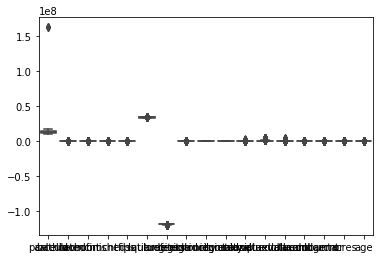

In [5]:
sns.boxplot(data = df)

In [6]:
df.drop(columns = ['parcelid', 'county', 'transactiondate'], inplace = True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50216 entries, 0 to 77573
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   50216 non-null  float64
 1   bedroomcnt                    50216 non-null  float64
 2   calculatedfinishedsquarefeet  50216 non-null  float64
 3   fips                          50216 non-null  float64
 4   latitude                      50216 non-null  float64
 5   longitude                     50216 non-null  float64
 6   regionidcity                  50216 non-null  float64
 7   regionidcounty                50216 non-null  float64
 8   regionidzip                   50216 non-null  float64
 9   structuretaxvaluedollarcnt    50216 non-null  float64
 10  taxvaluedollarcnt             50216 non-null  float64
 11  landtaxvaluedollarcnt         50216 non-null  float64
 12  taxamount                     50216 non-null  float64
 13  l

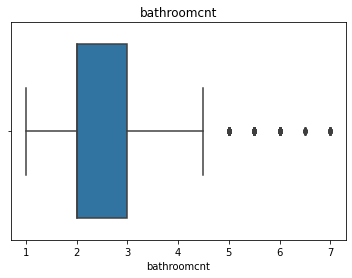

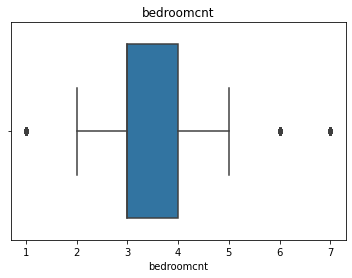

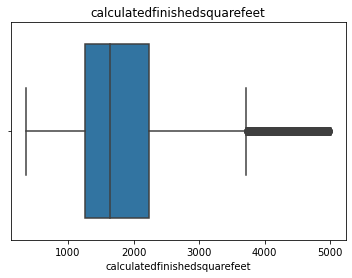

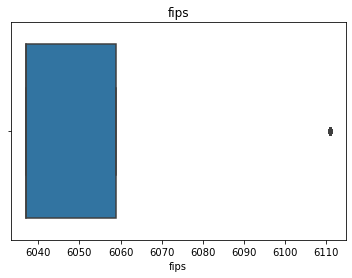

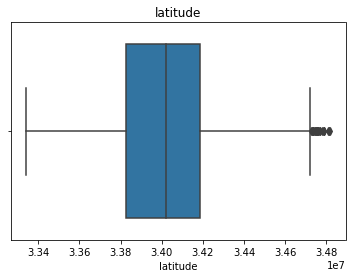

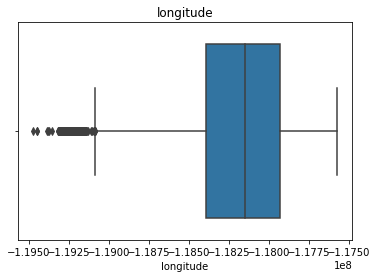

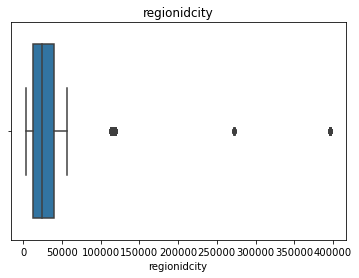

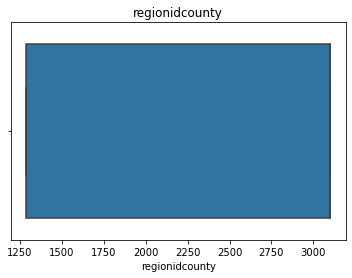

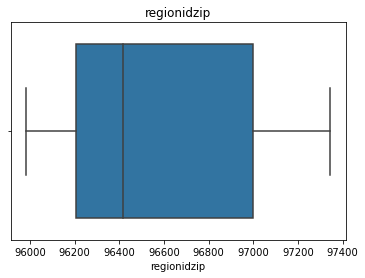

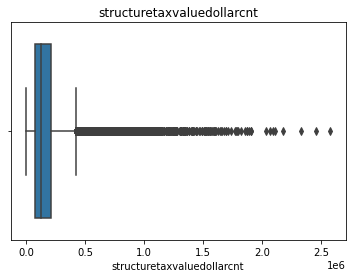

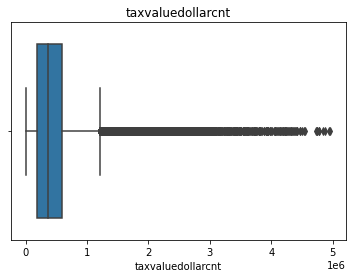

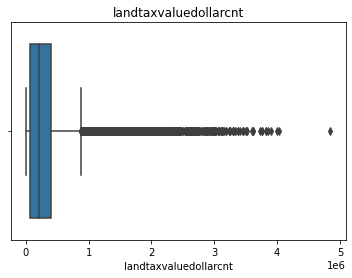

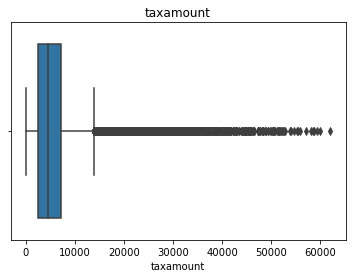

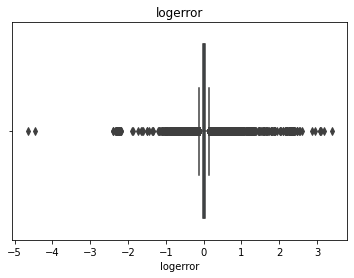

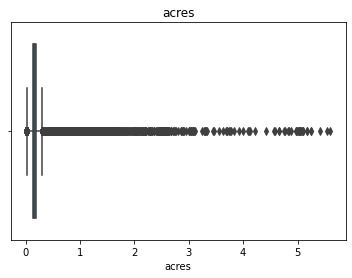

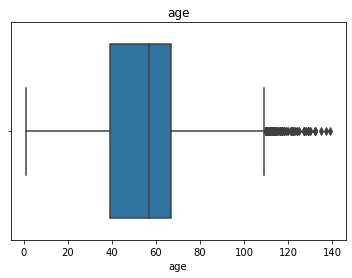

In [8]:
# visualize features for outliers
for col in df.columns:
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bathroomcnt,50216.0,2.240810e+00,0.905357,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,7.000000e+00
bedroomcnt,50216.0,3.276187e+00,0.895390,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,7.000000e+00
calculatedfinishedsquarefeet,50216.0,1.842641e+03,800.560278,3.600000e+02,1.260000e+03,1.638000e+03,2.243000e+03,4.999000e+03
fips,50216.0,6.049165e+03,21.093627,6.037000e+03,6.037000e+03,6.037000e+03,6.059000e+03,6.111000e+03
latitude,50216.0,3.402167e+07,272372.868230,3.334062e+07,3.382757e+07,3.401942e+07,3.418603e+07,3.481877e+07
longitude,50216.0,-1.181930e+08,354634.548294,-1.194753e+08,-1.183937e+08,-1.181508e+08,-1.179305e+08,-1.175723e+08
regionidcity,50216.0,3.363689e+04,49571.054838,3.491000e+03,1.244700e+04,2.481200e+04,4.022700e+04,3.965560e+05
regionidcounty,50216.0,2.525539e+03,803.233435,1.286000e+03,1.286000e+03,3.101000e+03,3.101000e+03,3.101000e+03
regionidzip,50216.0,9.656812e+04,422.971992,9.598200e+04,9.620600e+04,9.641500e+04,9.699600e+04,9.734400e+04
structuretaxvaluedollarcnt,50216.0,1.757288e+05,165059.780802,1.480000e+02,7.597800e+04,1.287665e+05,2.157740e+05,2.576028e+06


In [10]:
# split data
train, validate, test = wrangle.split_data(df)

In [11]:
# create baseline logerror
# train['baseline'] = train.logerror.mean()

In [12]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age
75214,1.0,2.0,907.0,6037.0,33972676.0,-118200826.0,30399.0,3101.0,96083.0,60371.0,210082.0,149711.0,3598.31,0.027041,0.116047,75.0
24152,3.0,3.0,1992.0,6037.0,34631648.0,-118178495.0,40227.0,3101.0,97329.0,80542.0,97498.0,16956.0,1310.63,-0.010172,2.330946,46.0
49878,1.0,3.0,948.0,6037.0,33965687.0,-118070134.0,396556.0,3101.0,96174.0,55963.0,267338.0,211375.0,5658.36,0.052885,0.123737,67.0
73397,2.0,3.0,1284.0,6037.0,33897209.0,-118069309.0,53636.0,3101.0,96193.0,38544.0,56534.0,17990.0,1105.48,0.040181,0.142287,68.0
2315,2.0,2.0,980.0,6037.0,34082174.0,-117968784.0,10241.0,3101.0,96465.0,60915.0,304575.0,243660.0,3881.02,0.002787,0.127916,89.0


<AxesSubplot:xlabel='fips', ylabel='logerror'>

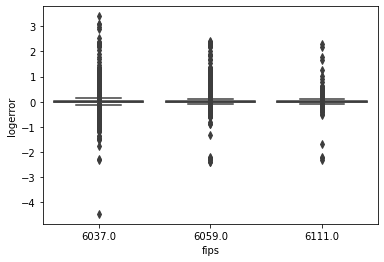

In [13]:
sns.boxplot(data = train, x = 'fips', y = 'logerror')

<AxesSubplot:xlabel='logerror'>

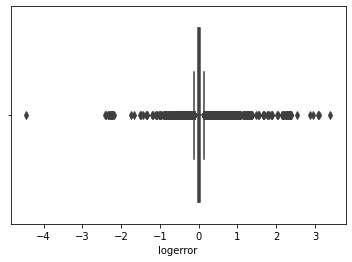

In [14]:
sns.boxplot(data = train, x = 'logerror')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

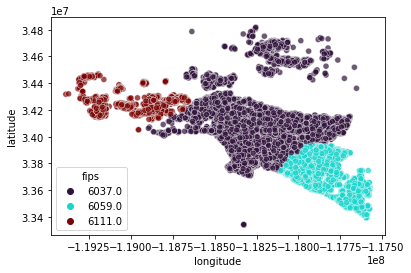

In [15]:
# pseudo map of data
sns.scatterplot(x='longitude',y='latitude',data=train, hue = 'fips', alpha = 0.7, palette = 'turbo')

In [16]:
# scale data
scaler, train_scaled, validate_scaled, test_scaled = wrangle.min_max_scaler(train, validate, test)

In [17]:
train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age
75214,0.000000,0.166667,0.117913,0.0,0.427600,0.653918,0.068457,1.0,0.074156,0.024481,0.041957,0.036537,0.057296,0.570937,0.019774,0.544118
24152,0.333333,0.333333,0.351800,0.0,0.873410,0.666215,0.093460,1.0,0.988987,0.032685,0.019118,0.003644,0.020365,0.566196,0.415675,0.330882
49878,0.000000,0.333333,0.126751,0.0,0.422872,0.725884,1.000000,1.0,0.140969,0.022688,0.053572,0.051816,0.090553,0.574230,0.021149,0.485294
73397,0.166667,0.333333,0.199181,0.0,0.376545,0.726339,0.127574,1.0,0.154919,0.015603,0.010808,0.003900,0.017053,0.572611,0.024465,0.492647
2315,0.166667,0.166667,0.133649,0.0,0.501678,0.781694,0.017173,1.0,0.354626,0.024702,0.061126,0.059815,0.061860,0.567847,0.021896,0.647059


## Ask questions
- What can we cluster?
    - bed/bath/sqft
    - lat/long/age/fips/acres
    - structuretax/taxvaluedollar/landtax/taxamount/acres
    - acres/sqft
    - bed/bath/taxvalue
- What drives logerror?
    - Bed/bath/sqft Clusters on logerror
    - Bed on logerror
    - bath on logerror
    - sqft on logerror
    - fips on logerror

## Clustering workflow
1. Choose features, create dataframe X
2. Elbow method to find k
3. Kmeans to create clusters
4. Add clusters to dataframe
5. Create centroids df for plotting
6. Visualize clusters
7. Statistical tests for logerror

In [18]:
train_scaled.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age
75214,0.000000,0.166667,0.117913,0.0,0.427600,0.653918,0.068457,1.0,0.074156,0.024481,0.041957,0.036537,0.057296,0.570937,0.019774,0.544118
24152,0.333333,0.333333,0.351800,0.0,0.873410,0.666215,0.093460,1.0,0.988987,0.032685,0.019118,0.003644,0.020365,0.566196,0.415675,0.330882
49878,0.000000,0.333333,0.126751,0.0,0.422872,0.725884,1.000000,1.0,0.140969,0.022688,0.053572,0.051816,0.090553,0.574230,0.021149,0.485294
73397,0.166667,0.333333,0.199181,0.0,0.376545,0.726339,0.127574,1.0,0.154919,0.015603,0.010808,0.003900,0.017053,0.572611,0.024465,0.492647
2315,0.166667,0.166667,0.133649,0.0,0.501678,0.781694,0.017173,1.0,0.354626,0.024702,0.061126,0.059815,0.061860,0.567847,0.021896,0.647059


In [19]:
# define features for clustering
X_train = train_scaled[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt']]
# define target
y_train = train_scaled.logerror

#repeat for validate ant test
X_validate = validate_scaled[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt']]
y_validate = validate_scaled.logerror

X_test = test_scaled[['bedroomcnt','bathroomcnt','calculatedfinishedsquarefeet','taxvaluedollarcnt']]
y_test = test_scaled.logerror


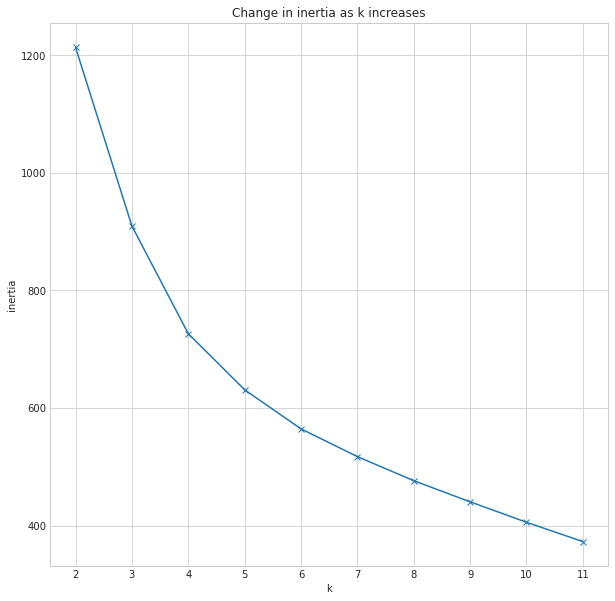

In [20]:
# elbow method to find k
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 10))
    pd.Series({k: KMeans(k).fit(X_train).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

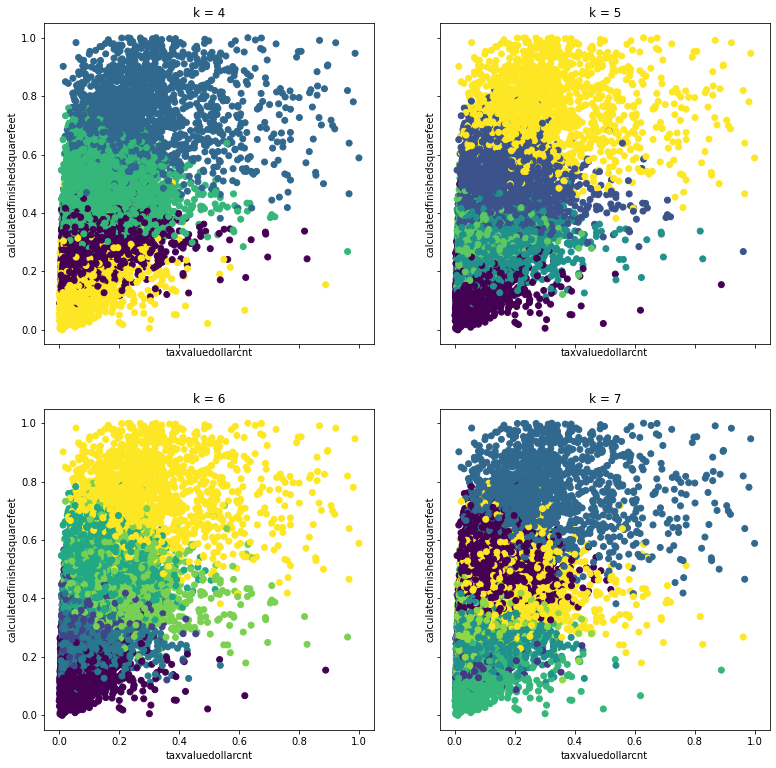

In [21]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(4, 8)):
    clusters = KMeans(k).fit(X_train).predict(X_train)
    ax.scatter(X_train.taxvaluedollarcnt, X_train.calculatedfinishedsquarefeet, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='taxvaluedollarcnt', ylabel='calculatedfinishedsquarefeet')

possible k = 4, 5 or 6

We will be using k = 4

In [22]:
# define cluster object
kmeans = KMeans(n_clusters=4, random_state = 333)
# fit cluster object to features
kmeans.fit(X_train)
# use the object
kmeans.predict(X_train);

In [23]:
# add cluster features to train and X_train df's
train['feature_cluster'] = kmeans.predict(X_train)

X_train['feature_cluster'] = kmeans.predict(X_train)

In [24]:
# adjust column for plotting purposes
# train['feature_cluster'] = 'cluster_' + train.feature_cluster.astype(str)
# X_train['feature_cluster'] = 'cluster_' + X_train.feature_cluster.astype(str)

In [25]:
X_train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,feature_cluster
75214,0.166667,0.000000,0.117913,0.041957,1
24152,0.333333,0.333333,0.351800,0.019118,2
49878,0.333333,0.000000,0.126751,0.053572,1
73397,0.333333,0.166667,0.199181,0.010808,2
2315,0.166667,0.166667,0.133649,0.061126,1
...,...,...,...,...,...
17718,0.333333,0.333333,0.427678,0.060219,0
4340,0.166667,0.333333,0.343177,0.134940,2
9497,0.500000,0.333333,0.456995,0.179681,0
2564,0.666667,0.666667,0.751886,0.304149,3


In [26]:
train.head()

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,regionidcity,regionidcounty,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,acres,age,feature_cluster
75214,1.0,2.0,907.0,6037.0,33972676.0,-118200826.0,30399.0,3101.0,96083.0,60371.0,210082.0,149711.0,3598.31,0.027041,0.116047,75.0,1
24152,3.0,3.0,1992.0,6037.0,34631648.0,-118178495.0,40227.0,3101.0,97329.0,80542.0,97498.0,16956.0,1310.63,-0.010172,2.330946,46.0,2
49878,1.0,3.0,948.0,6037.0,33965687.0,-118070134.0,396556.0,3101.0,96174.0,55963.0,267338.0,211375.0,5658.36,0.052885,0.123737,67.0,1
73397,2.0,3.0,1284.0,6037.0,33897209.0,-118069309.0,53636.0,3101.0,96193.0,38544.0,56534.0,17990.0,1105.48,0.040181,0.142287,68.0,2
2315,2.0,2.0,980.0,6037.0,34082174.0,-117968784.0,10241.0,3101.0,96465.0,60915.0,304575.0,243660.0,3881.02,0.002787,0.127916,89.0,1


In [27]:
X_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,feature_cluster
75214,0.166667,0.000000,0.117913,0.041957,1
24152,0.333333,0.333333,0.351800,0.019118,2
49878,0.333333,0.000000,0.126751,0.053572,1
73397,0.333333,0.166667,0.199181,0.010808,2
2315,0.166667,0.166667,0.133649,0.061126,1


In [28]:
pd.DataFrame(kmeans.cluster_centers_)



,0,1,2,3
0,0.491599,0.314562,0.452727,0.116900
1,0.211700,0.036598,0.160354,0.060121
2,0.370680,0.181053,0.259402,0.073007
3,0.579219,0.530226,0.721255,0.271532


In [29]:
# def get_centroids(kmeans, cluster_vars, cluster_name):
#     # get the centroids for each distinct cluster...

#     centroid_col_names = ['centroid_' + i for i in cluster_vars]

#     centroid_df = pd.DataFrame(kmeans.cluster_centers_, 
#                                columns=centroid_col_names).reset_index().rename(columns={'index': cluster_name})

#     return centroid_df

In [30]:
X_train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,feature_cluster
75214,0.166667,0.000000,0.117913,0.041957,1
24152,0.333333,0.333333,0.351800,0.019118,2
49878,0.333333,0.000000,0.126751,0.053572,1
73397,0.333333,0.166667,0.199181,0.010808,2
2315,0.166667,0.166667,0.133649,0.061126,1


In [31]:
X_train.loc[:, X_train.columns != 'feature_cluster']

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
75214,0.166667,0.000000,0.117913,0.041957
24152,0.333333,0.333333,0.351800,0.019118
49878,0.333333,0.000000,0.126751,0.053572
73397,0.333333,0.166667,0.199181,0.010808
2315,0.166667,0.166667,0.133649,0.061126
...,...,...,...,...
17718,0.333333,0.333333,0.427678,0.060219
4340,0.166667,0.333333,0.343177,0.134940
9497,0.500000,0.333333,0.456995,0.179681
2564,0.666667,0.666667,0.751886,0.304149


In [32]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns = X_train.loc[:, X_train.columns != 'feature_cluster'].columns)

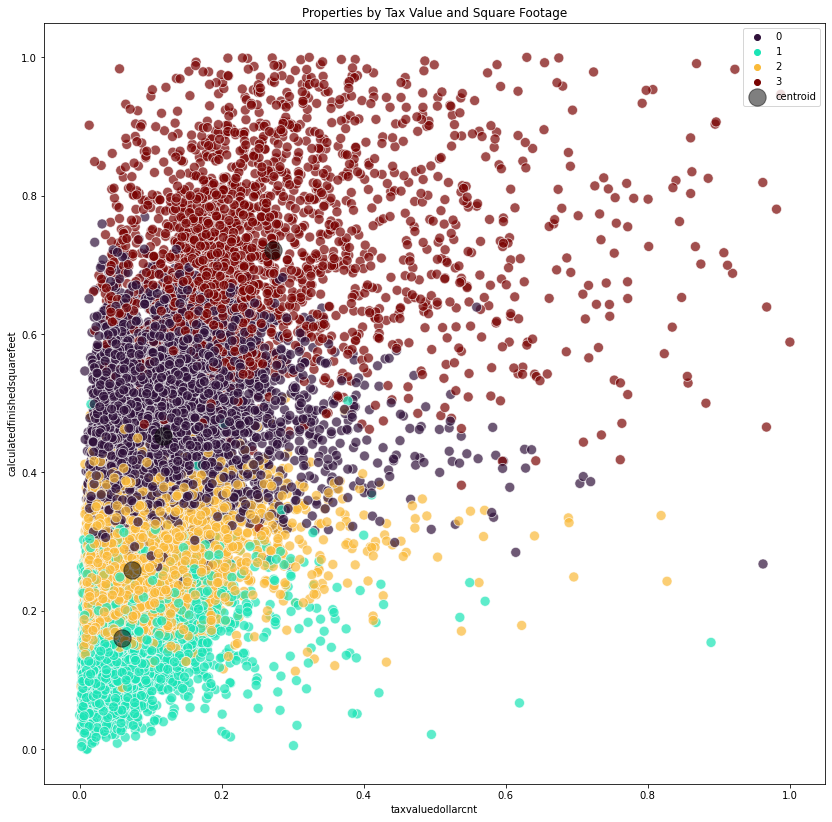

In [33]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_train, x = 'taxvaluedollarcnt', y = 'calculatedfinishedsquarefeet', hue = 'feature_cluster', s = 100, alpha = 0.7, palette = 'turbo')
centroids.plot.scatter(x='taxvaluedollarcnt',y='calculatedfinishedsquarefeet',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Properties by Tax Value and Square Footage')
plt.legend(loc = 'upper right')

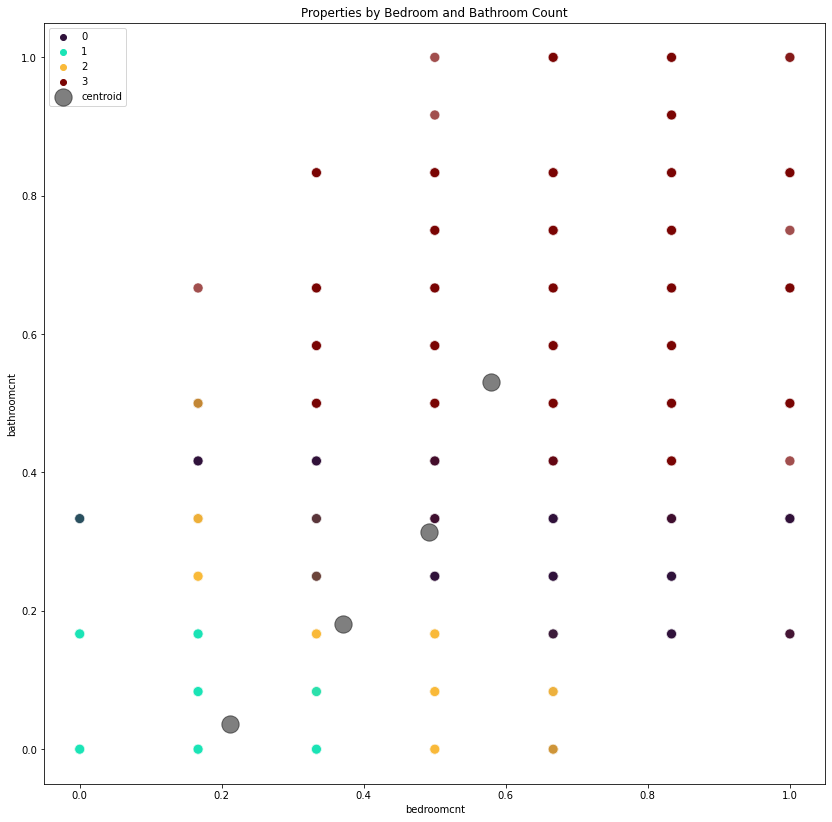

In [34]:
# visualize
plt.figure(figsize = (14,14))
sns.scatterplot(data = X_train, x = 'bedroomcnt', y = 'bathroomcnt', hue = 'feature_cluster', s = 100, alpha = 0.7, palette = 'turbo')
centroids.plot.scatter(x='bedroomcnt',y='bathroomcnt',ax = plt.gca(), color = 'black',alpha = 0.5, s=300, label = 'centroid')
plt.title('Properties by Bedroom and Bathroom Count')
plt.legend(loc = 'upper left')

Cluster 1 = low taxvalue, low sqft, low bed/bath
    Small houses with few bed/bath
    
Cluster 2 = low-mid tax, low-mid sqft, low-mid bed/bath
    Small houses with a couple bed/bath
    
Cluster 3 = high taxvalue, high sqft, high bed/bath
    Large houses with more bathrooms
        MORE BATHS MORE RICH?
        
Cluster 4 = average taxvalue, diverse sqft : bed/bath

## Statistical Tests

### 1. Is logerror different between clusters based on house features?
- Run anova test

$H_{0}$: Means of the logerror between clusters are equal

$H_{a}$ Means of the logerror between clusters are not equal

In [35]:
from scipy import stats
alpha = 0.5

In [36]:
f, p = stats.f_oneway(train[train.feature_cluster == 'cluster_0'].logerror,
                     train[train.feature_cluster == 'cluster_1'].logerror,
                     train[train.feature_cluster == 'cluster_2'].logerror,
                     train[train.feature_cluster == 'cluster_3'].logerror)

In [37]:
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


#### The means are different, but is there a correlation between our cluster and logerror?

- pearsonr test

$H_{0}$: There is no correlation between feature clusters and logerror

$H_{a}$ There is a correlation between feature clusters and logerror

In [38]:
x = train.feature_cluster
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We fail to reject the null hypothesis


#### There is no correlation, let's visualize it to double check

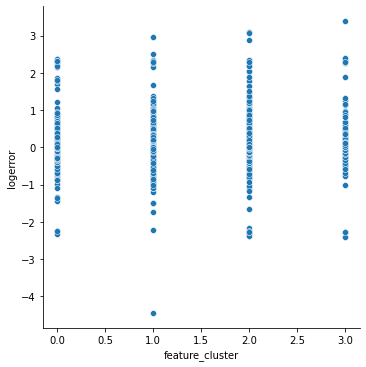

In [39]:
sns.relplot(data = train, x = 'feature_cluster', y = 'logerror')

### 2. Is there a correlation between bedroom count and logerror?

- pearsonr test

$H_{0}$: There is no correlation between bedroom count and logerror

$H_{a}$ There is a correlation between bedroom count and logerror

In [40]:
x = train.bedroomcnt
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


#### There is a correlation between bedroom count and logerror
Let's visualize

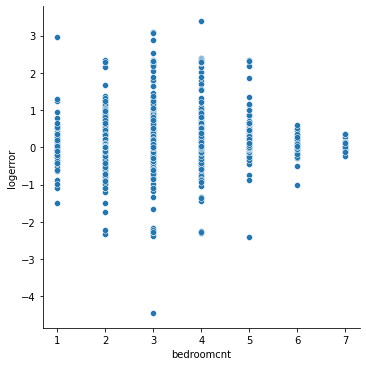

In [41]:
sns.relplot(data = train, x = 'bedroomcnt', y = 'logerror')

The log error is greater within the second quartile of the bedroomcnt

### 3. Is there a correlation between bathroom count and logerror?

- pearsonr test

$H_{0}$: There is no correlation between bathroom count and logerror

$H_{a}$ There is a correlation between bathroom count and logerror

In [42]:
x = train.bathroomcnt
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


#### There is a correlation between bathroom count and logerror

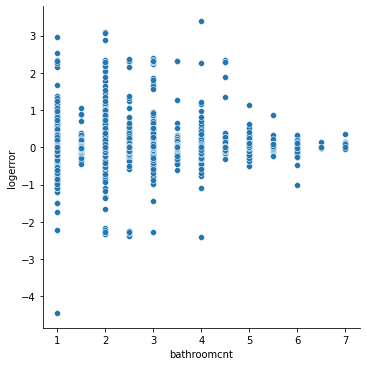

In [43]:
sns.relplot(data = train, x = 'bathroomcnt', y = 'logerror')

It looks like the first quartile has greater log error

### 4. Is there a correlation between calculatedfinishedsquarefeet and logerror?

- pearsonr test

$H_{0}$: There is no correlation between finished square feet and logerror

$H_{a}$ There is a correlation between finished square feet and logerror

In [44]:
x = train.calculatedfinishedsquarefeet
y = train.logerror

corr, p = stats.pearsonr(x, y)

if p < alpha:
    print('We reject the null hypothesis')
else:
    print('We fail to reject the null hypothesis')

We reject the null hypothesis


There is a correlation between finished square feet and logerror

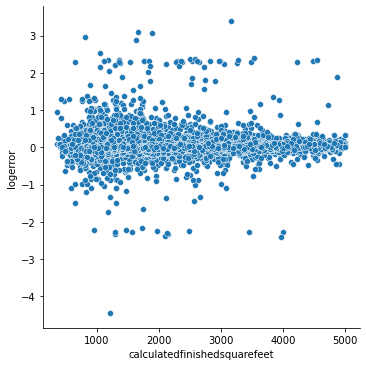

In [45]:
sns.relplot(data = train, x = 'calculatedfinishedsquarefeet', y = 'logerror')